In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical,load_img,img_to_array
from keras.layers import Conv2D,Activation, Dropout,MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten

In [4]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x = x_test

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

5


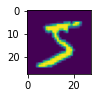

0


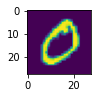

4


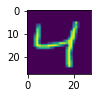

1


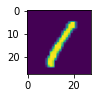

9


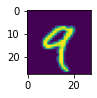

2


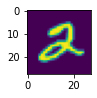

1


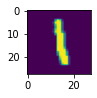

3


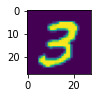

1


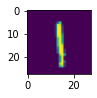

In [ ]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
  print(y_train[i])
  plt.show()

In [9]:
x_train = x_train.astype('float32')/255.0 #chia dữ liệu về dạng 0:1 
x_test = x_test.astype('float32')/255.0
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
# MODEL CNN
from keras.models import Sequential
from keras.layers import Conv2D,Activation, Dropout,MaxPooling2D

model = Sequential()
# BLOCK 1
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same' ,input_shape =(28,28,1)))
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 2
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 2
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

In [ ]:
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(10,activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD

opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=20,verbose=1,validation_data=(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
469/469 [==============================] - 32s 38ms/step - loss: 0.3095 - accuracy: 0.9059 - val_loss: 0.0522 - val_accuracy: 0.9831
Epoch 2/20
469/469 [==============================] - 17s 35ms/step - loss: 0.0435 - accuracy: 0.9865 - val_loss: 0.0465 - val_accuracy: 0.9855
Epoch 3/20
469/469 [==============================] - 17s 36ms/step - loss: 0.0311 - accuracy: 0.9900 - val_loss: 0.0364 - val_accuracy: 0.9886
Epoch 4/20
469/469 [==============================] - 17s 35ms/step - loss: 0.0221 - accuracy: 0.9927 - val_loss: 0.0297 - val_accuracy: 0.9902
Epoch 5/20
469/469 [==============================] - 17s 36ms/step - loss: 0.0172 - accuracy: 0.9945 - val_loss: 0.0283 - val_accuracy: 0.9910
Epoch 6/20
469/469 [==============================] - 17s 36ms/step - loss: 0.0127 - accuracy: 0.9961 - val_loss: 0.0303 - val_accuracy: 0.9913
Epoch 7/20
469/469 [==============================] - 17s 37ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0280 - val_accuracy:

In [ ]:
#from keras.models import load_model
#model_cifar10 = load_model('CNN_cifar10.h5')
model.save('CNN_MNIST.h5')

In [31]:
#kiểm tra độ chính xác
score = model.evaluate(x_test,y_test,verbose=1)
print('Test loss= ',score[0])
print('Test accuracy= ',score[1])


313/313 [==============================] - 14s 46ms/step - loss: 0.0318 - accuracy: 0.9932
Test loss=  0.03180059790611267
Test accuracy=  0.9932000041007996


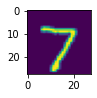

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


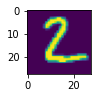

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


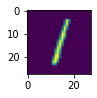

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


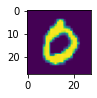

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


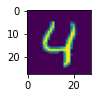

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


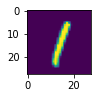

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


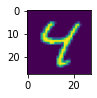

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


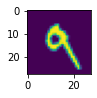

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


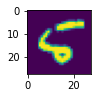

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
#Test độ chính xác bằng hình ảnh
import numpy as np
y_pred=model.predict(x_test)
for i in range(9):
  plt.subplot(330+i+1) #330: 3 hang 3 cot, stt di tu trai sang phai tren duoi,i=0 thi 331 phan tu tuong tac la so 1
  plt.imshow(x[i])
  plt.show()
  print(np.round(y_pred[i]))

In [23]:
from keras.models import load_model
model = load_model('/content/CNN_MNIST.h5')